# Import Necessary Libraries

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder

# Import Datast

In [228]:
fraud_check_data = pd.read_csv('Fraud_check.csv')

In [229]:
fraud_check_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Data Understanding

In [230]:
fraud_check_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

###### No null values are present.

## Data Preparation

fraud_check_data.insert(loc = 0,column = 'taxable.income',value = 0)

fraud_check_data

fraud_check_data.loc[fraud_check_data["Taxable.Income"]<=30000,"taxable.income"]=1
fraud_check_data.drop(["Taxable.Income"],axis=1,inplace=True)
fraud_check_data

In [234]:
fraud_check_data = pd.read_csv('Fraud_check.csv')

#fraud_check_data.insert(loc = 0,column = 'taxable.income',value = 0)

fraud_check_data['taxable.income'] = 'Risky'
fraud_check_data.loc[fraud_check_data["Taxable.Income"]>30000,"taxable.income"]='Good'
fraud_check_data.drop(["Taxable.Income"],axis=1,inplace=True)
fraud_check_data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxable.income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good



###### or Another way of achivinf this is
comp_data["sales"]="small"
comp_data.loc[comp_data["Sales"]>7.49,"sales"]="large"
comp_data.drop(["Sales"],axis=1,inplace=True)

In [235]:
fraud_check_data['Marital.Status'] = LabelEncoder().fit_transform(fraud_check_data['Marital.Status']) #0 : Divorced, 1: Married, 2: Single
fraud_check_data['Urban']          = LabelEncoder().fit_transform(fraud_check_data['Urban'])          #1 : yes, 0: No
fraud_check_data['taxable.income'] = LabelEncoder().fit_transform(fraud_check_data['taxable.income']) #1 : Good, 0: Risky
fraud_check_data['Undergrad']      = LabelEncoder().fit_transform(fraud_check_data['Undergrad'])      #1 : yes, 0: No

In [236]:
fraud_check_data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxable.income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


# Model Building

In [237]:
X = fraud_check_data.drop(labels=['taxable.income'],axis=1)  
y = fraud_check_data[['taxable.income']]
X.shape,y.shape

((600, 5), (600, 1))

In [238]:
dt_model = DecisionTreeClassifier()

# Model Training

In [239]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [240]:
X_train.shape

(480, 5)

In [241]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

# Model Testing || Model Evaluation

### Training Data

In [242]:
y_pred_train = dt_model.predict(X_train)

In [243]:
print(accuracy_score(y_train,y_pred_train))

1.0


In [244]:
print('The accuracy score for Training data is \n',accuracy_score(y_train,y_pred_train))
print('The classification report for Training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for Training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for Training data is 
 1.0
The classification report for Training data is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       111

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

The confusion matrix for Training data is 
 [[369   0]
 [  0 111]]


1.0


Text(0, 0.5, 'True positive rate')

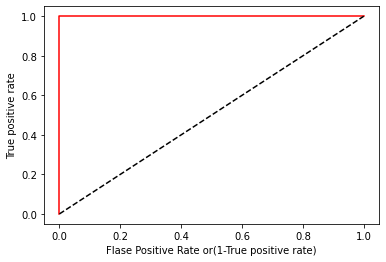

In [245]:
fpr,tpr,threshholds = roc_curve(y_train,dt_model.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')


### Testing Data

In [246]:
y_pred_test = dt_model.predict(X_test)

In [249]:
print('The accuracy score for Testing data is \n',accuracy_score(y_test,y_pred_test))
print('The classification report for Testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for Testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for Testing data is 
 0.6583333333333333
The classification report for Testing data is 
               precision    recall  f1-score   support

           0       0.88      0.71      0.79       107
           1       0.09      0.23      0.13        13

    accuracy                           0.66       120
   macro avg       0.49      0.47      0.46       120
weighted avg       0.80      0.66      0.72       120

The confusion matrix for Testing data is 
 [[76 31]
 [10  3]]


# The model has overfitted.

### Let us use gridsearchcv to get best parameters.

In [250]:
grid_search = GridSearchCV(estimator=dt_model,
                          param_grid={'criterion':['gini','entropy'],
                                     'max_depth':[2,3,4,5,6,7,8,9,10]},
                          cv = 5)
grid_search.fit(X,y) # fit whole data

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [251]:
print(grid_search.best_params_)
print(grid_search.best_score_) 

{'criterion': 'entropy', 'max_depth': 2}
0.7916666666666666


In [252]:
dt_model_1 = DecisionTreeClassifier(criterion='entropy', max_depth= 2)

# Model Training

In [253]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [255]:
dt_model_1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

# Model Testing || Model Evaluation

### Training Data

In [256]:
y_pred_train = dt_model_1.predict(X_train)

In [146]:
print(accuracy_score(y_train,y_pred_train))

0.76875


In [257]:
print('The accuracy score for Training data is \n',accuracy_score(y_train,y_pred_train))
print('The classification report for Training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for Training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for Training data is 
 0.76875
The classification report for Training data is 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       369
           1       0.00      0.00      0.00       111

    accuracy                           0.77       480
   macro avg       0.38      0.50      0.43       480
weighted avg       0.59      0.77      0.67       480

The confusion matrix for Training data is 
 [[369   0]
 [111   0]]


0.5


Text(0, 0.5, 'True positive rate')

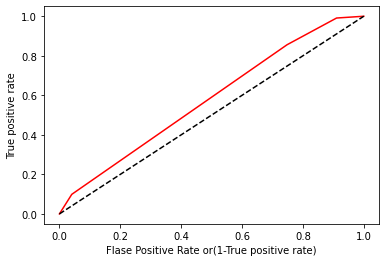

In [258]:
fpr,tpr,threshholds = roc_curve(y_train,dt_model_1.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'dt_model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')


### Testing Data

In [259]:
y_pred_test = dt_model_1.predict(X_test)

In [260]:
print('The accuracy score for Testing data is \n',accuracy_score(y_test,y_pred_test))
print('The classification report for Testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for Testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for Testing data is 
 0.8916666666666667
The classification report for Testing data is 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       107
           1       0.00      0.00      0.00        13

    accuracy                           0.89       120
   macro avg       0.45      0.50      0.47       120
weighted avg       0.80      0.89      0.84       120

The confusion matrix for Testing data is 
 [[107   0]
 [ 13   0]]


In [261]:
grid_search = GridSearchCV(estimator=dt_model,
                          param_grid={'criterion':['gini','entropy'],
                                     'max_depth':[2,3,4,5,6,7,8,9,10]},
                          cv =10 )
grid_search.fit(X,y) # fit whole data

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [262]:
print(grid_search.best_params_)
print(grid_search.best_score_) 

{'criterion': 'gini', 'max_depth': 3}
0.7916666666666667


In [263]:
dt_model_2 = DecisionTreeClassifier(criterion='gini', max_depth=3)

# Model Training

In [265]:
dt_model_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

# Model Testing || Model Evaluation

### Training Data

In [266]:
y_pred_train = dt_model_2.predict(X_train)

In [267]:
print('The accuracy score for Training data is \n',accuracy_score(y_train,y_pred_train))
print('The classification report for Training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for Training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for Training data is 
 0.7791666666666667
The classification report for Training data is 
               precision    recall  f1-score   support

           0       0.78      0.99      0.87       369
           1       0.73      0.07      0.13       111

    accuracy                           0.78       480
   macro avg       0.75      0.53      0.50       480
weighted avg       0.77      0.78      0.70       480

The confusion matrix for Training data is 
 [[366   3]
 [103   8]]


0.5319709953856295


Text(0, 0.5, 'True positive rate')

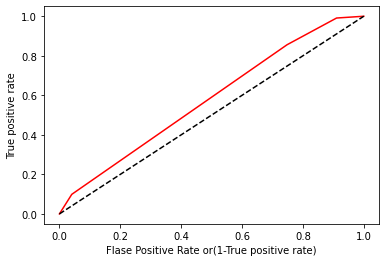

In [268]:
fpr,tpr,threshholds = roc_curve(y_train,dt_model_1.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'dt_model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')


### Testing Data

In [269]:
y_pred_test = dt_model_2.predict(X_test)

In [270]:
print('The accuracy score for Testing data is \n',accuracy_score(y_test,y_pred_test))
print('The classification report for Testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for Testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for Testing data is 
 0.85
The classification report for Testing data is 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       107
           1       0.00      0.00      0.00        13

    accuracy                           0.85       120
   macro avg       0.44      0.48      0.46       120
weighted avg       0.79      0.85      0.82       120

The confusion matrix for Testing data is 
 [[102   5]
 [ 13   0]]


In [271]:
dt_model_3 = DecisionTreeClassifier(criterion='gini', max_depth=5)

# Model Training

In [272]:
dt_model_3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

# Model Testing || Model Evaluation

### Training Data

In [273]:
y_pred_train = dt_model_3.predict(X_train)

In [274]:
print('The accuracy score for Training data is \n',accuracy_score(y_train,y_pred_train))
print('The classification report for Training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for Training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for Training data is 
 0.79375
The classification report for Training data is 
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       369
           1       0.88      0.13      0.22       111

    accuracy                           0.79       480
   macro avg       0.83      0.56      0.55       480
weighted avg       0.81      0.79      0.73       480

The confusion matrix for Training data is 
 [[367   2]
 [ 97  14]]


0.5603530359627921


Text(0, 0.5, 'True positive rate')

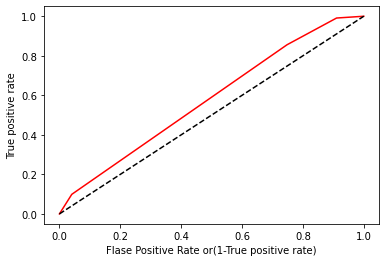

In [275]:
fpr,tpr,threshholds = roc_curve(y_train,dt_model_1.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'dt_model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')


### Testing Data

In [276]:
y_pred_test = dt_model_3.predict(X_test)

In [277]:
print('The accuracy score for Testing data is \n',accuracy_score(y_test,y_pred_test))
print('The classification report for Testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for Testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for Testing data is 
 0.85
The classification report for Testing data is 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       107
           1       0.00      0.00      0.00        13

    accuracy                           0.85       120
   macro avg       0.44      0.48      0.46       120
weighted avg       0.79      0.85      0.82       120

The confusion matrix for Testing data is 
 [[102   5]
 [ 13   0]]


In [278]:
dt_model_4 = DecisionTreeClassifier(criterion='gini', max_depth=7)

In [280]:
# Model Training
dt_model_4.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

# Model Testing || Model Evaluation

### Training Data

In [281]:
y_pred_train = dt_model_4.predict(X_train)

In [282]:
print('The accuracy score for Training data is \n',accuracy_score(y_train,y_pred_train))
print('The classification report for Training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for Training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for Training data is 
 0.8125
The classification report for Training data is 
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       369
           1       0.96      0.20      0.33       111

    accuracy                           0.81       480
   macro avg       0.88      0.60      0.61       480
weighted avg       0.84      0.81      0.76       480

The confusion matrix for Training data is 
 [[368   1]
 [ 89  22]]


0.5977440855489635


Text(0, 0.5, 'True positive rate')

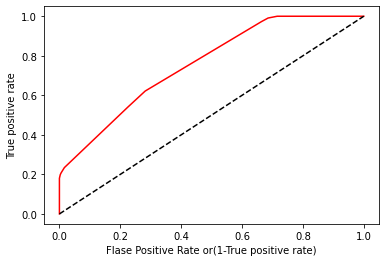

In [283]:
fpr,tpr,threshholds = roc_curve(y_train,dt_model_4.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'dt_model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')


### Testing Data

In [284]:
y_pred_test = dt_model_4.predict(X_test)

In [285]:
print('The accuracy score for Testing data is \n',accuracy_score(y_test,y_pred_test))
print('The classification report for Testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for Testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for Testing data is 
 0.8416666666666667
The classification report for Testing data is 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       107
           1       0.00      0.00      0.00        13

    accuracy                           0.84       120
   macro avg       0.44      0.47      0.46       120
weighted avg       0.79      0.84      0.82       120

The confusion matrix for Testing data is 
 [[101   6]
 [ 13   0]]


In [286]:
dt_model_5 = DecisionTreeClassifier(criterion='gini', max_depth=10)

# Model Training

In [287]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)
dt_model_5.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

# Model Testing || Model Evaluation

### Training Data

In [288]:
y_pred_train = dt_model_5.predict(X_train)

In [289]:
print('The accuracy score for Training data is \n',accuracy_score(y_train,y_pred_train))
print('The classification report for Training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for Training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for Training data is 
 0.8541666666666666
The classification report for Training data is 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       369
           1       1.00      0.37      0.54       111

    accuracy                           0.85       480
   macro avg       0.92      0.68      0.73       480
weighted avg       0.88      0.85      0.83       480

The confusion matrix for Training data is 
 [[369   0]
 [ 70  41]]


0.6846846846846847


Text(0, 0.5, 'True positive rate')

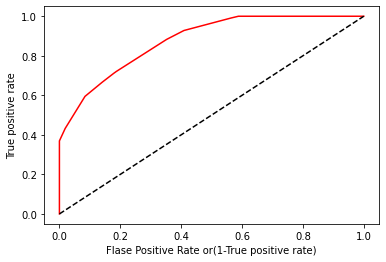

In [291]:
fpr,tpr,threshholds = roc_curve(y_train,dt_model_5.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'dt_model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')


### Testing Data

In [292]:
y_pred_test = dt_model_5.predict(X_test)

In [293]:
print('The accuracy score for Testing data is \n',accuracy_score(y_test,y_pred_test))
print('The classification report for Testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for Testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for Testing data is 
 0.8083333333333333
The classification report for Testing data is 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       107
           1       0.08      0.08      0.08        13

    accuracy                           0.81       120
   macro avg       0.49      0.49      0.49       120
weighted avg       0.80      0.81      0.80       120

The confusion matrix for Testing data is 
 [[96 11]
 [12  1]]


# dt_model_5 is the best model as misclassification count is less.

In [294]:
dt_model_5.feature_importances_

array([0.01379438, 0.06084596, 0.6110052 , 0.28308721, 0.03126726])

In [295]:
dt_model_5.feature_names_in_

array(['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban'], dtype=object)

In [299]:
imp_f = pd.DataFrame(['Undergrad', 'Marital.Status', 'City.Population','Work.Experience', 'Urban'])
imp_f

,0
0,Undergrad
1,Marital.Status
2,City.Population
3,Work.Experience
4,Urban


In [301]:
imp_f.insert(loc=1,column='FeatureImportance',value=[0.01379438, 0.06084596, 0.6110052 , 0.28308721, 0.03126726])

In [302]:
imp_f

,0,FeatureImportance
0,Undergrad,0.013794
1,Marital.Status,0.060846
2,City.Population,0.611005
3,Work.Experience,0.283087
4,Urban,0.031267


In [308]:
a = pd.DataFrame()
a.insert(loc=0,column='FeatureName',value=['Undergrad', 'Marital.Status', 'City.Population','Work.Experience', 'Urban'])
a.insert(loc=1,column='FeatureImportance',value=[0.01379438, 0.06084596, 0.6110052 , 0.28308721, 0.03126726])

In [309]:
a

,FeatureName,FeatureImportance
0,Undergrad,0.013794
1,Marital.Status,0.060846
2,City.Population,0.611005
3,Work.Experience,0.283087
4,Urban,0.031267


In [312]:
a.sort_values(by='FeatureImportance',ascending=False,inplace=True)

In [313]:
a

,FeatureName,FeatureImportance
2,City.Population,0.611005
3,Work.Experience,0.283087
1,Marital.Status,0.060846
4,Urban,0.031267
0,Undergrad,0.013794


# city population is most important attribute in fraud.